# Epidemiological Model Assignment – Parameter Exploration
*Understanding disease dynamics*

---

## Overview
- **Duration:** 3–5 hours  
- **Group size:** 3–4 students  
- **Format:** Jupyter Notebook  
- **Assessment:** Repository setup (5%), Code quality (30%), Documentation (25%), Results interpretation (40%)

This assignment focuses on systematic parameter exploration to understand how different factors affect epidemic outcomes.

---

## Setup and submission format

### Jupyter notebook structure
Your submission should be a single notebook with the following sections:

1. **Setup & Imports** (provided starter code)  
2. **Part 1: Parameter Analysis Function**  
3. **Part 2: Scenario Comparison**  
4. **Part 3: Policy Recommendations**  
5. **Conclusions**



## Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Assignment task: Recovery rate investigation
Using the **SIRD model** from your practical as a starting point, you will investigate how the recovery rate affects epidemic outcomes.

## SIRD model:

In [2]:
def sird_model(y, t, beta, gamma, mu):
    """
    SIRD model with death compartment

    Additional parameter:
    - mu: mortality rate

    New compartment:
    - D: Deaths
    """
    S, I, R, D = y
    N = S + I + R + D


    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I

    return dSdt, dIdt, dRdt, dDdt

# Test SIRD function
test_result = sird_model([990, 10, 0, 0], 0, 0.3, 0.1, 0.01)
print(f"SIRD test result: {test_result}")

SIRD test result: (-2.97, 1.87, 1.0, 0.1)


## Part 1: Parameter analysis function (50 points)

**Task:** Create a function called `analyze_recovery_rates()` that systematically explores different recovery rates.

### 1.1 Function implementation
Create a well-documented function with the following signature:

In [3]:
def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    # Your implementation here

    # Test values
    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]

    # time grid
    t = np.linspace(0, simulation_days, simulation_days)

    # container for results
    rows = []

    # initial state
    S0 = N - I0
    R0_init = 0
    D0_init = 0
    y0 = [S0, I0, R0_init, D0_init]

    # simulate for each gamma
    for gamma in gamma_values:
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S, I, R, D = sol.T

        peak_infected = float(np.max(I))
        peak_day = int(np.argmax(I))
        total_deaths = float(D[-1])

        R0_val = beta / gamma

        rows.append({
            'gamma': gamma,
            'R0': R0_val,
            'peak_infected': peak_infected,
            'peak_day': peak_day,
            'total_deaths': total_deaths
        })

    results_df = pd.DataFrame(
        rows, columns=['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']
    )

    # --- I(t): infectious curves for each γ ---
    fig = plt.figure(figsize=(10, 6))
    for r in rows:
        gamma = r['gamma']
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        I = sol[:, 1]
        plt.plot(t, I, label=f'γ={gamma:.2f}, R₀={beta/gamma:.2f}', linewidth=2)

    plt.xlabel('Time (days)')
    plt.ylabel('Infectious population')
    plt.title(f'Epidemic curves vs. recovery rate (β={beta}, μ={mu}, N={N}, I₀={I0})')
    plt.legend(title='Recovery rate', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- S(t): susceptible curves for each γ ---
    fig = plt.figure(figsize=(10, 6))
    for r in rows:
        gamma = r['gamma']
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        S = sol[:, 0]
        plt.plot(t, S, label=f'γ={gamma:.2f}, R₀={beta/gamma:.2f}', linewidth=2)

    plt.xlabel('Time (days)')
    plt.ylabel('Susceptible population')
    plt.title(f'Susceptible S(t) vs. recovery rate (β={beta}, μ={mu}, N={N}, I₀={I0})')
    plt.legend(title='Recovery rate', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- R(t): recovered curves for each γ ---
    fig = plt.figure(figsize=(10, 6))
    for r in rows:
        gamma = r['gamma']
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        R = sol[:, 2]
        plt.plot(t, R, label=f'γ={gamma:.2f}, R₀={beta/gamma:.2f}', linewidth=2)

    plt.xlabel('Time (days)')
    plt.ylabel('Recovered population')
    plt.title(f'Recovered R(t) vs. recovery rate (β={beta}, μ={mu}, N={N}, I₀={I0})')
    plt.legend(title='Recovery rate', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- D(t): deceased curves for each γ ---
    fig = plt.figure(figsize=(10, 6))
    for r in rows:
        gamma = r['gamma']
        sol = odeint(sird_model, y0, t, args=(beta, gamma, mu))
        D = sol[:, 3]
        plt.plot(t, D, label=f'γ={gamma:.2f}, R₀={beta/gamma:.2f}', linewidth=2)

    plt.xlabel('Time (days)')
    plt.ylabel('Deaths')
    plt.title(f'Deceased D(t) vs. recovery rate (β={beta}, μ={mu}, N={N}, I₀={I0})')
    plt.legend(title='Recovery rate', fontsize=9)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return results_df


### 1.2 Requirements

- Test recovery rates: gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
- For each γ value, calculate:
    - Peak number of infectious individuals
    - Day when peak occurs
    - Total deaths at end of simulation
    - Basic reproduction number (R₀ = β/γ)
- Return results as a formatted pandas DataFrame
- Generate a publication-quality plot showing all epidemic curves

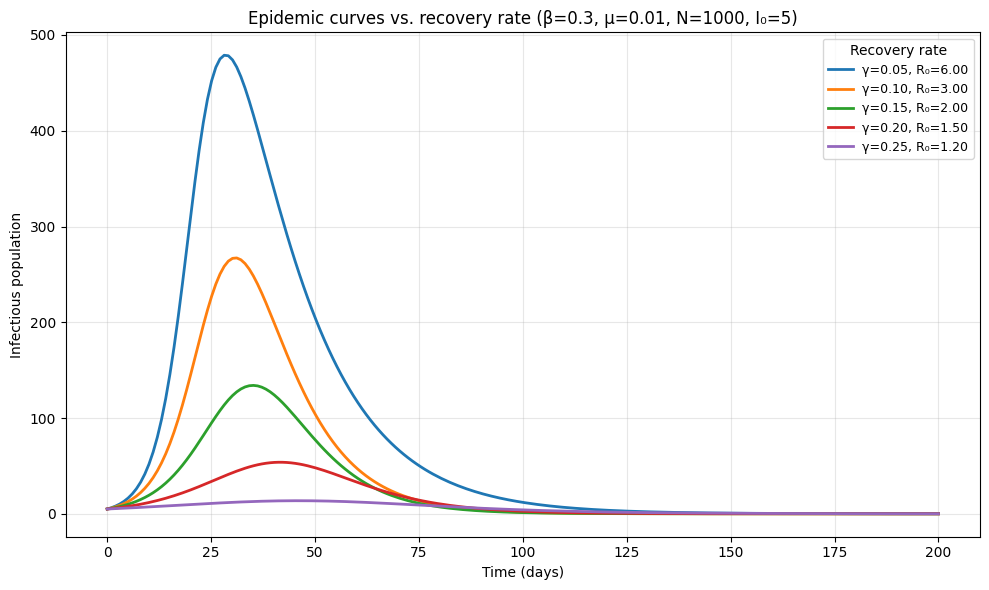

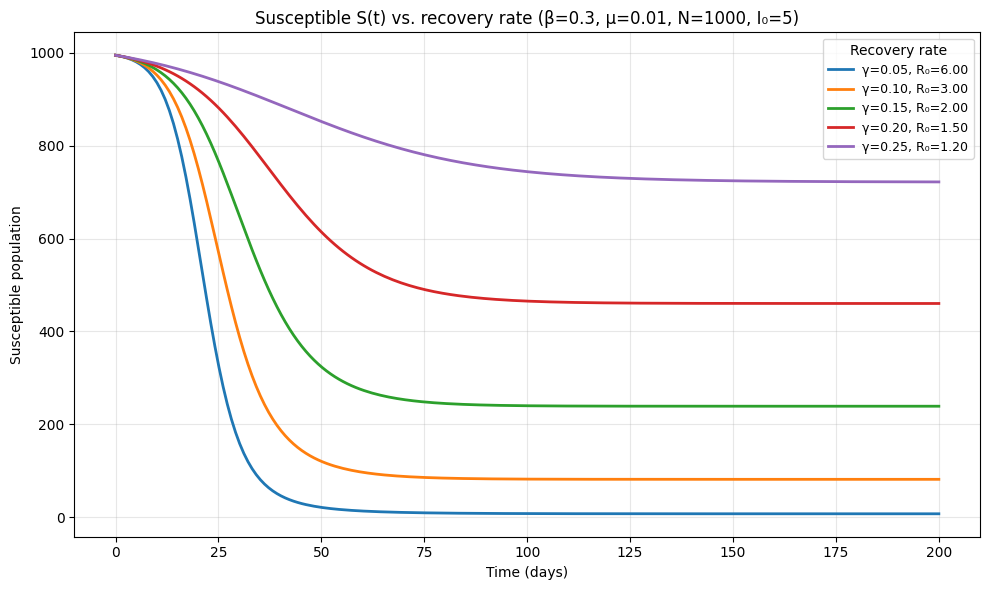

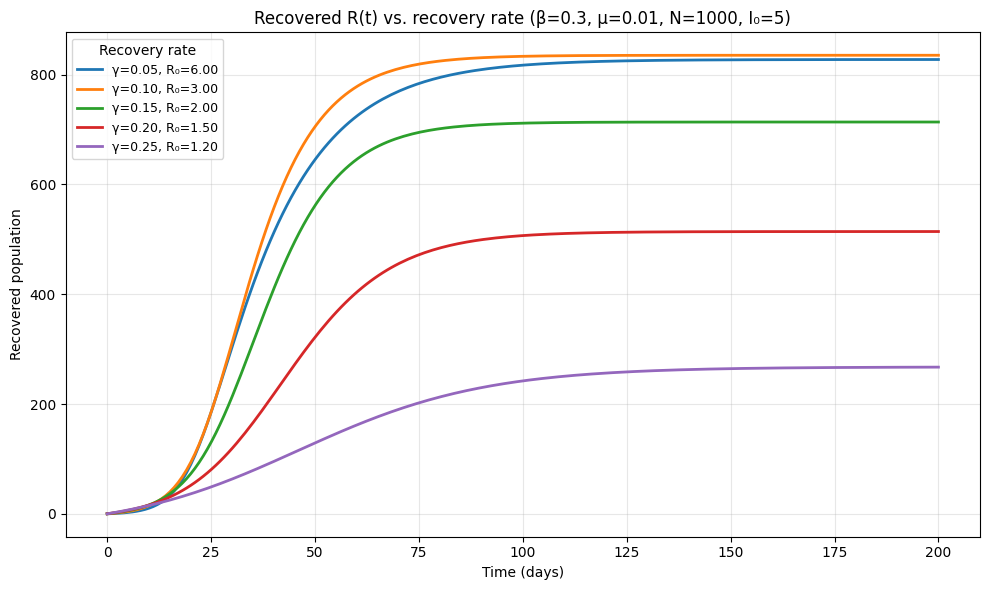

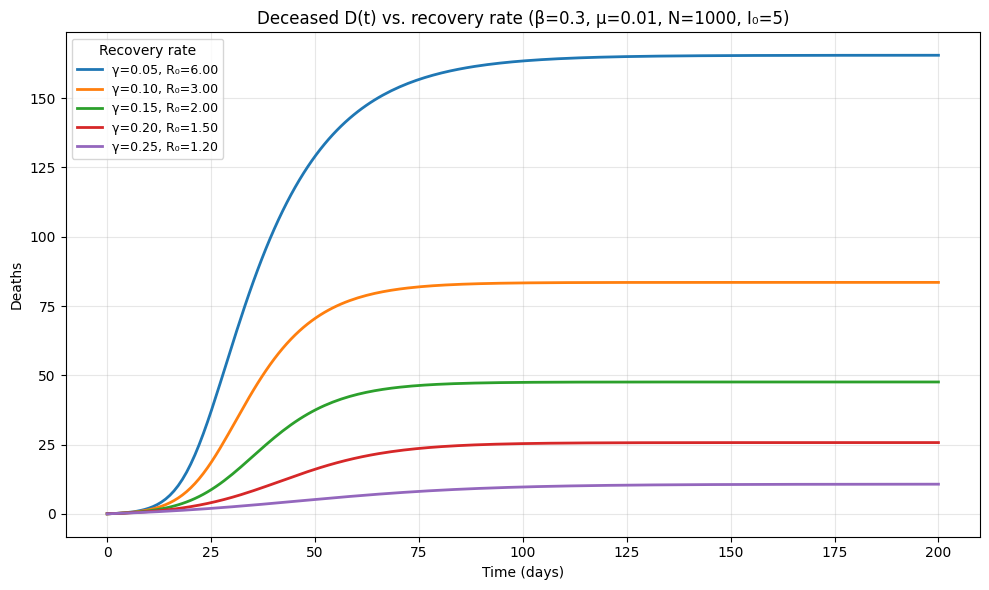

analyze_recovery_rates() output:
   gamma   R0  peak_infected  peak_day  total_deaths
0   0.05  6.0         478.83        28        165.50
1   0.10  3.0         267.17        31         83.53
2   0.15  2.0         134.08        35         47.58
3   0.20  1.5          53.82        41         25.71
4   0.25  1.2          13.66        46         10.69


In [4]:
def test_analyze_recovery_rates_small():
    # Sample parameters
    beta = 0.3
    mu = 0.01
    N = 1000
    I0 = 5
    simulation_days = 200

    # Run the analysis
    df = analyze_recovery_rates(beta, mu, N, I0, simulation_days)

    # Basic sanity checks
    expected_cols = ['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']
    assert list(df.columns) == expected_cols, f"Unexpected columns: {df.columns.tolist()}"
    assert len(df) == 5, f"Expected 5 gamma values, got {len(df)}"
    assert df['gamma'].tolist() == [0.05, 0.1, 0.15, 0.2, 0.25], "Gamma list mismatch"
    assert (df['peak_day'] >= 0).all() and (df['peak_day'] < simulation_days).all(), "Peak day out of range"
    assert (df['total_deaths'] >= 0).all(), "Deaths should be non-negative"

    print("analyze_recovery_rates() output:")
    print(df.round(2))

    return df

# Run the test
a = test_analyze_recovery_rates_small()


### 1.3 Expected output format
Your function should produce:

- A DataFrame with columns: `['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']`
- A matplotlib figure with properly labeled axes, legend, and title

# Part 2: Scenario comparison


### Scenario A 
beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200

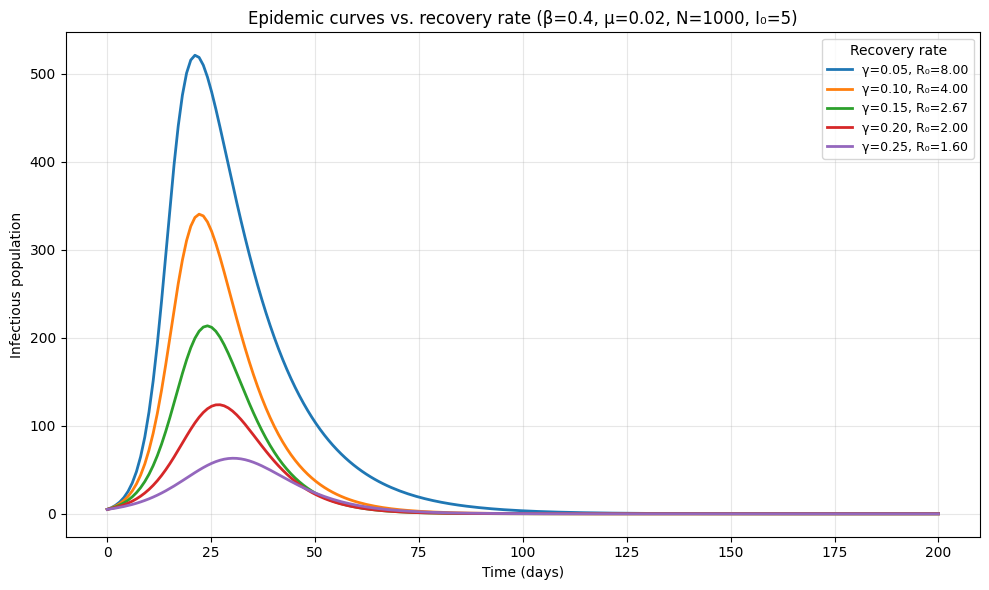

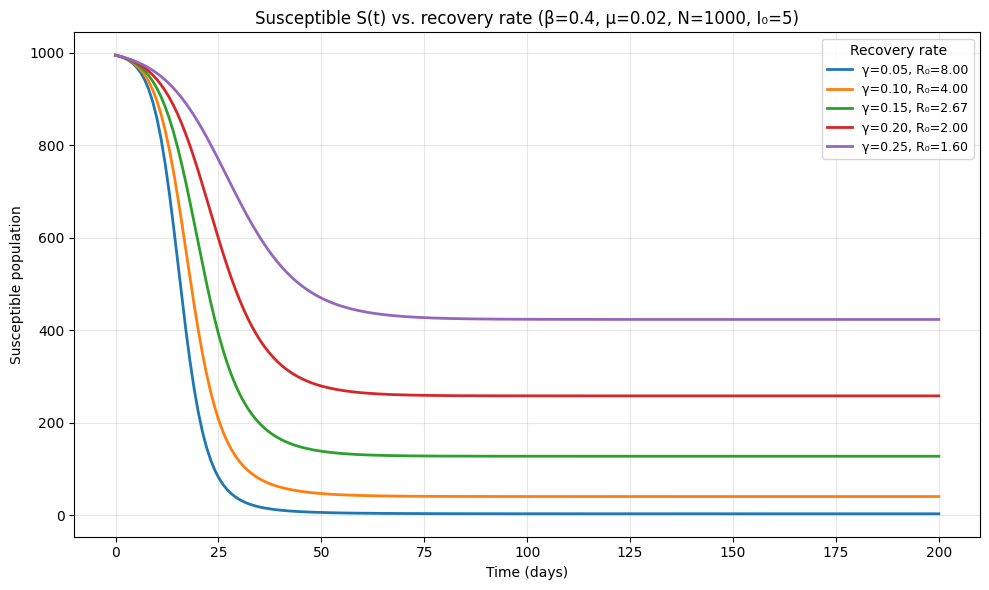

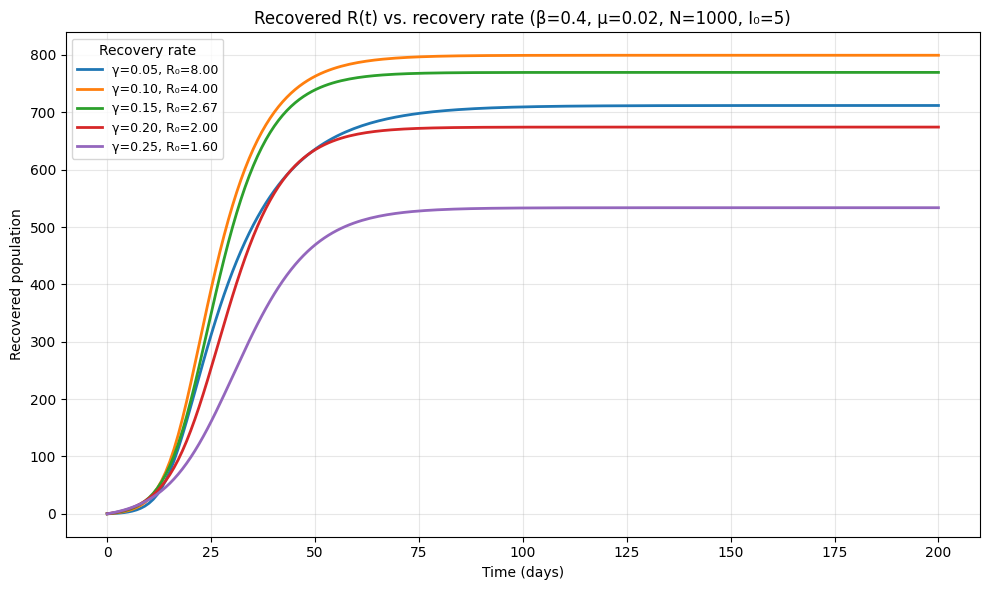

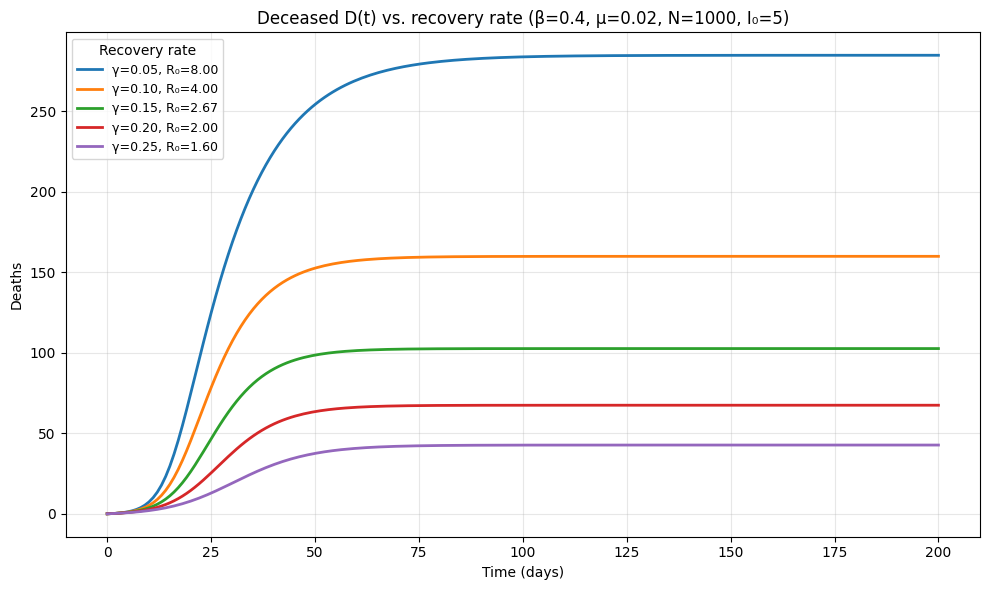

In [7]:
results_A = analyze_recovery_rates(beta=0.4, mu=0.02, N=1000, I0=5, simulation_days=200)


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,8.000000,520.757922,21,284.757434
1,0.10,4.000000,340.259908,22,159.892366
2,0.15,2.666667,213.467271,24,102.610885
3,0.20,2.000000,123.830763,27,67.423926
4,0.25,1.600000,63.070351,30,42.694003


### Scenario B
beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200

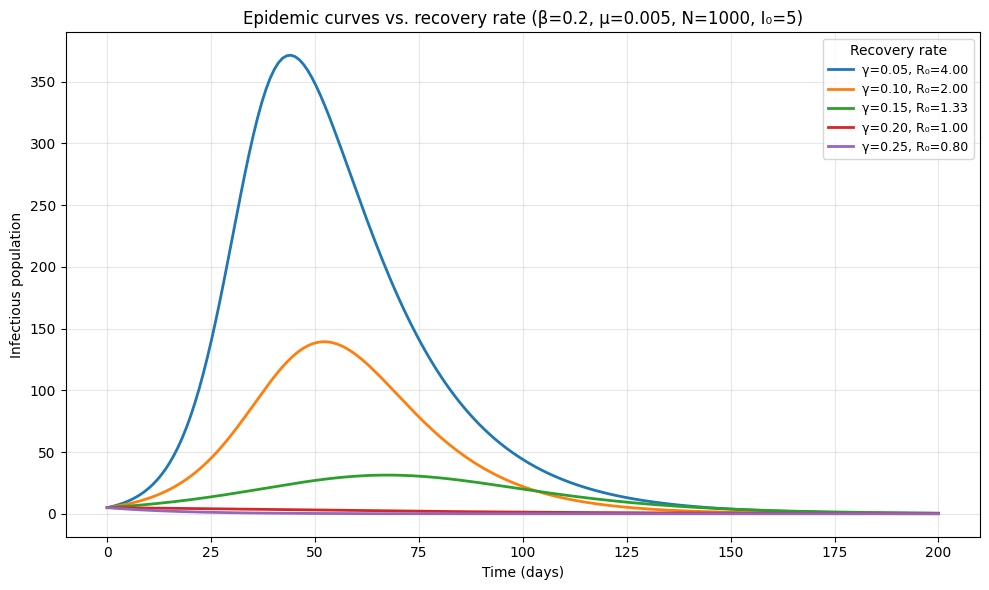

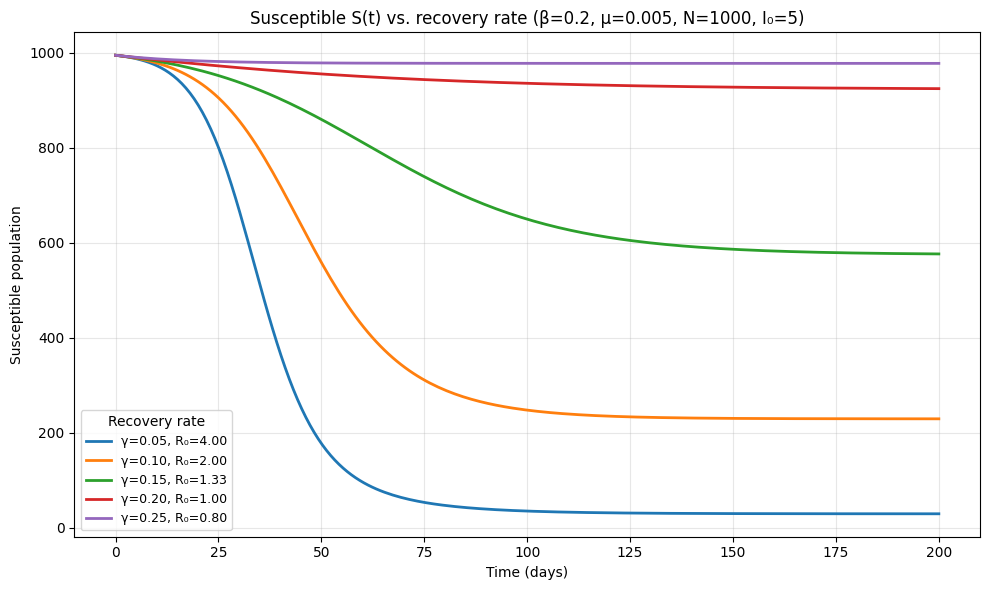

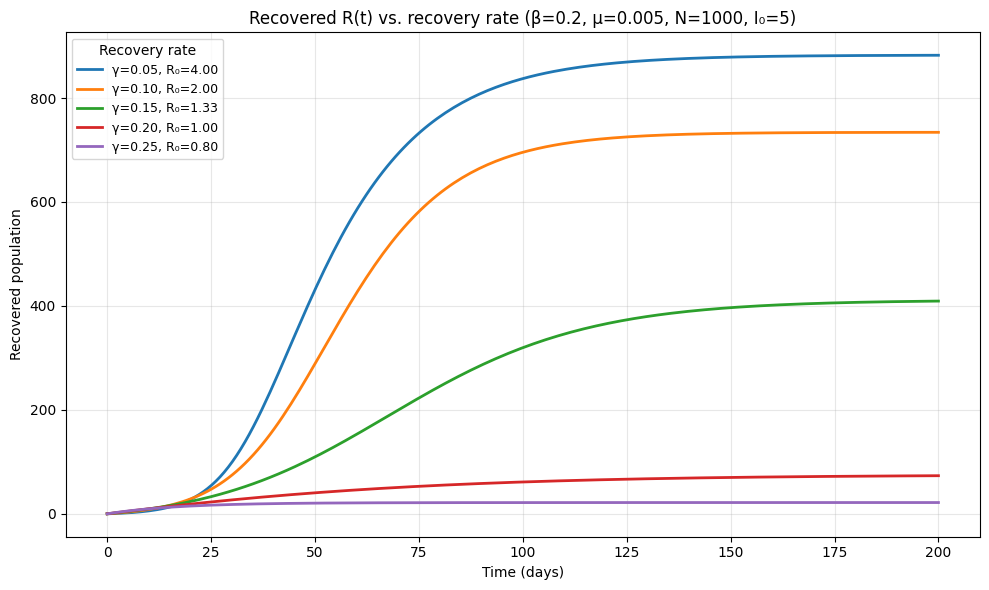

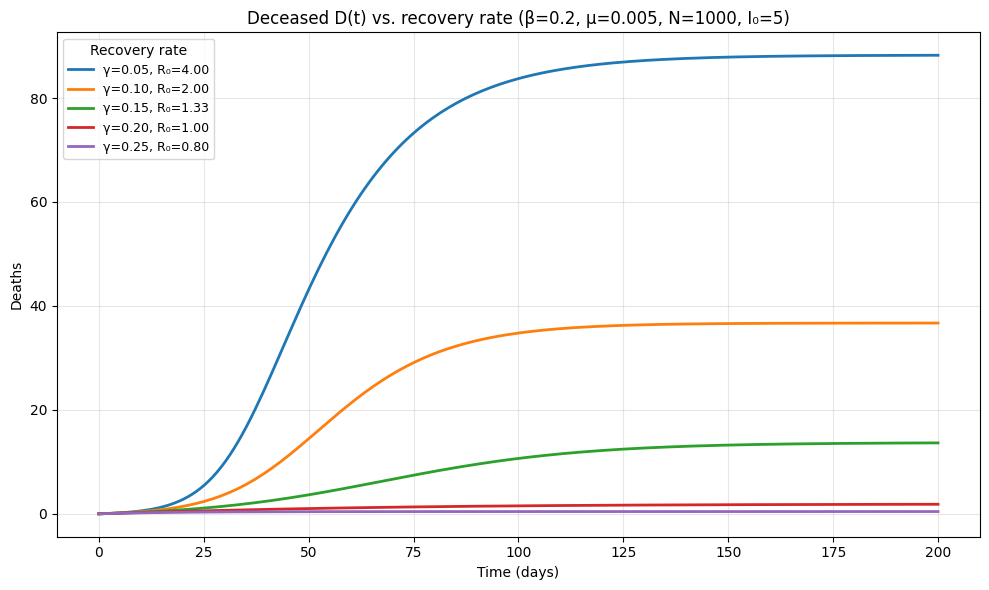

In [9]:
results_B = analyze_recovery_rates(beta=0.2, mu=0.005, N=1000, I0=5, simulation_days=200)


In [25]:
print("Scenario A")
display(results_A.head())
print("Scenario B")
display(results_B.head())







Scenario A


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,8.000000,520.757922,21,284.757434
1,0.10,4.000000,340.259908,22,159.892366
2,0.15,2.666667,213.467271,24,102.610885
3,0.20,2.000000,123.830763,27,67.423926
4,0.25,1.600000,63.070351,30,42.694003


Scenario B


,gamma,R0,peak_infected,peak_day,total_deaths
0,0.05,4.000000,371.304875,44,88.225824
1,0.10,2.000000,139.343938,52,36.700237
2,0.15,1.333333,31.343160,67,13.642779
3,0.20,1.000000,5.000000,0,1.832013
4,0.25,0.800000,5.000000,0,0.433167


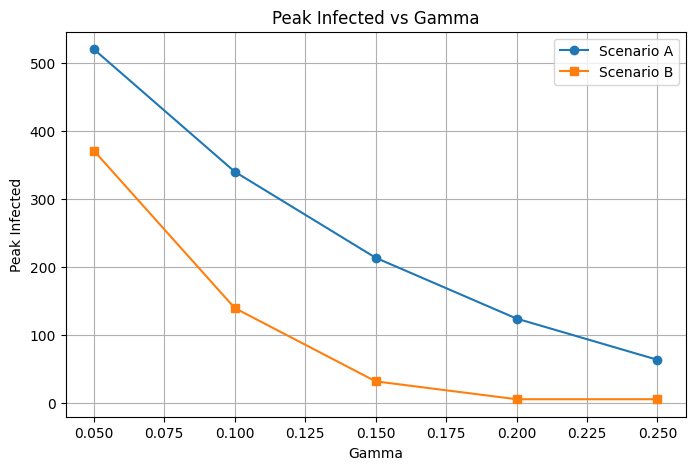

In [41]:

plt.figure(figsize=(8, 5))
plt.plot(results_A['gamma'], results_A['peak_infected'], marker='o', label='Scenario A')
plt.plot(results_B['gamma'], results_B['peak_infected'], marker='s', label='Scenario B')
plt.xlabel('Gamma')
plt.ylabel('Peak Infected')
plt.title('Peak Infected vs Gamma')
plt.legend()
plt.grid(True)
plt.show()






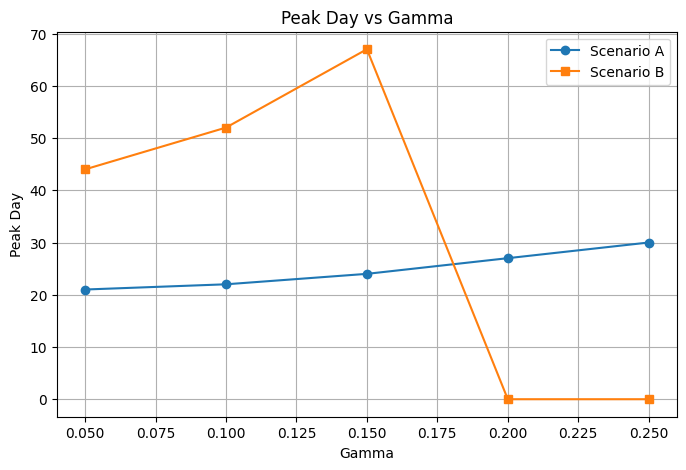

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(results_A['gamma'], results_A['peak_day'], marker='o', label='Scenario A')
plt.plot(results_B['gamma'], results_B['peak_day'], marker='s', label='Scenario B')
plt.xlabel('Gamma')
plt.ylabel('Peak Day')
plt.title('Peak Day vs Gamma')
plt.legend()
plt.grid(True)
plt.show()

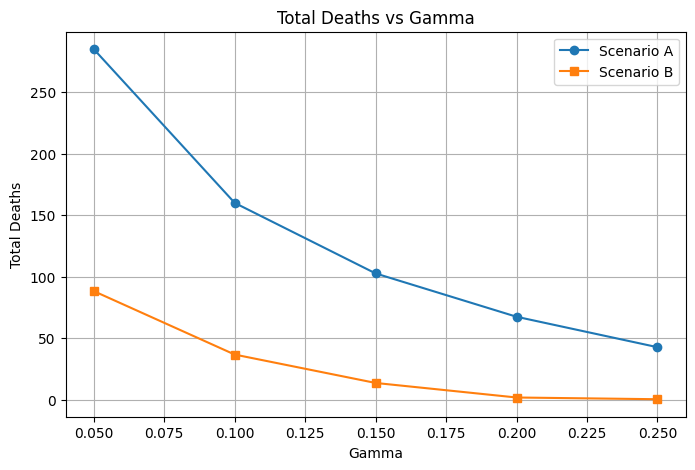

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(results_A['gamma'], results_A['total_deaths'], marker='o', label='Scenario A')
plt.plot(results_B['gamma'], results_B['total_deaths'], marker='s', label='Scenario B')
plt.xlabel('Gamma')
plt.ylabel('Total Deaths')
plt.title('Total Deaths vs Gamma')
plt.legend()
plt.grid(True)
plt.show()


###  Analysis: Scenario A vs Scenario B

 Scenario A presents significantly worse public health outcomes compared to Scenario B. The following observations support this conclusion:



#### 1. Higher Total Deaths
- Scenario A consistently shows much higher mortality.
  - At `gamma = 0.05`, total deaths are 284.76 in Scenario A vs 88.23 in Scenario B.
  - Even at higher recovery rates (`gamma = 0.25`), deaths in Scenario A (42.69) are nearly 100× greater than in Scenario B (0.43).
- This indicates a more lethal and widespread outbreak in Scenario A.


#### 2. Faster and Higher Infection Peaks
- The peak number of infected individuals is much higher in Scenario A:
  - Up to 520 infected at peak vs only 371 in Scenario B.
- Infections also peak earlier in Scenario A (as early as day 21) vs Scenario B (peaks occur after day 44)
- This suggests a more rapid and overwhelming outbreak which puts immense pressure on healthcare systems.


#### 3. Slower Dynamics in Scenario B
- Scenario B spreads more slowly, giving more time to respond with interventions (e.g., vaccination, treatment, isolation).
- Lower peaks and delayed outbreaks help in flattening the curve, making Scenario B more manageable.

####  Conclusion
Scenario A is significantly worse for public health due to:
- Higher and earlier peaks in infections,
- Much greater total deaths across all recovery rates,
- Faster outbreak progression, leaving less time for intervention.

In contrast, Scenario B simulates a more controlled epidemic, likely due to a lower transmission rate (`β`) or better interventions, making it preferable from a public health perspective.

# Part 3: Policy recommendations

### 3.1 Parameter impact analysis

**How does increasing recovery rate affect peak infections, total deaths, and epidemic duration?**

- **Peak infections:**  
  When γ is higher, people recover faster and spend less time being infectious. They have fewer chances to contaminate other people, so the infection peak is much lower.  
  **Example**: With γ = 0.10, peak infections reached ~340. When γ was doubled to 0.20, the peak dropped to ~124.

- **Total deaths:**  
  Faster recovery shortens the infectious period, which reduces the number of new infections that can occur. With fewer cases, there are fewer deaths.  
  **Example**: Total deaths decreased from ~160 (γ = 0.10) to ~67 (γ = 0.20).

- **Epidemic duration:**  
  Higher recovery rates cause the outbreak to calm more quickly, as infections resolve faster and the susceptible population is exposed for a shorter time.  
  **Example**: Duration shortened from ~85 days (γ = 0.10) to ~77 days (γ = 0.20).

**Conclusion:**  
Increasing the recovery rate reduces how many people are infectious at the same time, lowers the total number of deaths, and shortens how long the epidemic lasts. So: γ is a key factor in controlling the severity of the epidemic and its duration.

### 3.2 Intervention analysis

**If an intervention could increase recovery rate by 50%, what would be the expected impact on total deaths?**

**Setup (Scenario A):** β = 0.40, μ = 0.02, N = 1000, I₀ = 5, days = 200.  
Baseline γ = 0.10 → **Intervention γ = 1.5 × 0.10 = 0.15**.

**Reproduction number:**  
- Baseline: R₀ = β/γ = 0.40 / 0.10 = **4.00**  
- Intervention: R₀ = 0.40 / 0.15 = **2.67** (↓ by 1.33)

**Total deaths:**

- Baseline (γ = 0.10): 159.9 deaths  
- Intervention (γ = 0.15): 102.6 deaths  

- 159.9 − 102.6 = **57.3 fewer deaths**
- 57.3 ÷ 159.9 × 100 ≈ **35.8% fewer deaths**

**Result:** Total deaths fall by about 57 people, which is a 36% reduction.

A 50% increase in recovery rate (γ: 0.10 → 0.15) reduces total deaths by **~57 people (~36%)** in Scenario A, mainly by shortening the infectious period (lower R₀), which cuts transmission chains and lowers overall cases.

### 3.3 Real-world application

**Name one real medical intervention that could increase recovery rates. Explain the mechanism and estimate realistic effectiveness.**

One example of an intervention that increases recovery rates is **antiviral treatment** (example used: nirmatrelvir/ritonavir for COVID-19): 
- **Mechanism**: Antivirals stop the virus from replicating, which shortens the time a person is sick and infectious. 
- *Example*: Paxlovid works by inhibiting the SARS-CoV-2 main protease, which the virus needs to replicate. By reducing the replication, we allow the patients to recover faster and spend less time being infectious.
- **Effectiveness**: Antivirals can shorten illness and lower the risk of severe outcomes, increasing the recovery rate γ.
- *Example*: Clinical trials showed that Paxlovid reduced the risk of hospitalization or death by about *89%* when given within three days of symptom onset. This is a significant increase in the recovery rate γ.  

Antivirals like Paxlovid effectively increase γ in SIR-type models and help reduce the severity of the epidemic by shortening the infectious period and preventing progression to severe disease.

**Reference:** Marzi, M., Vakil, M.K., Bahmanyar, M., & Zarenezhad, E. (2022). *Paxlovid: Mechanism of Action, Synthesis, and In Silico Study*. BioMed Research International, 2022, Article ID 7341493. https://doi.org/10.1155/2022/7341493

